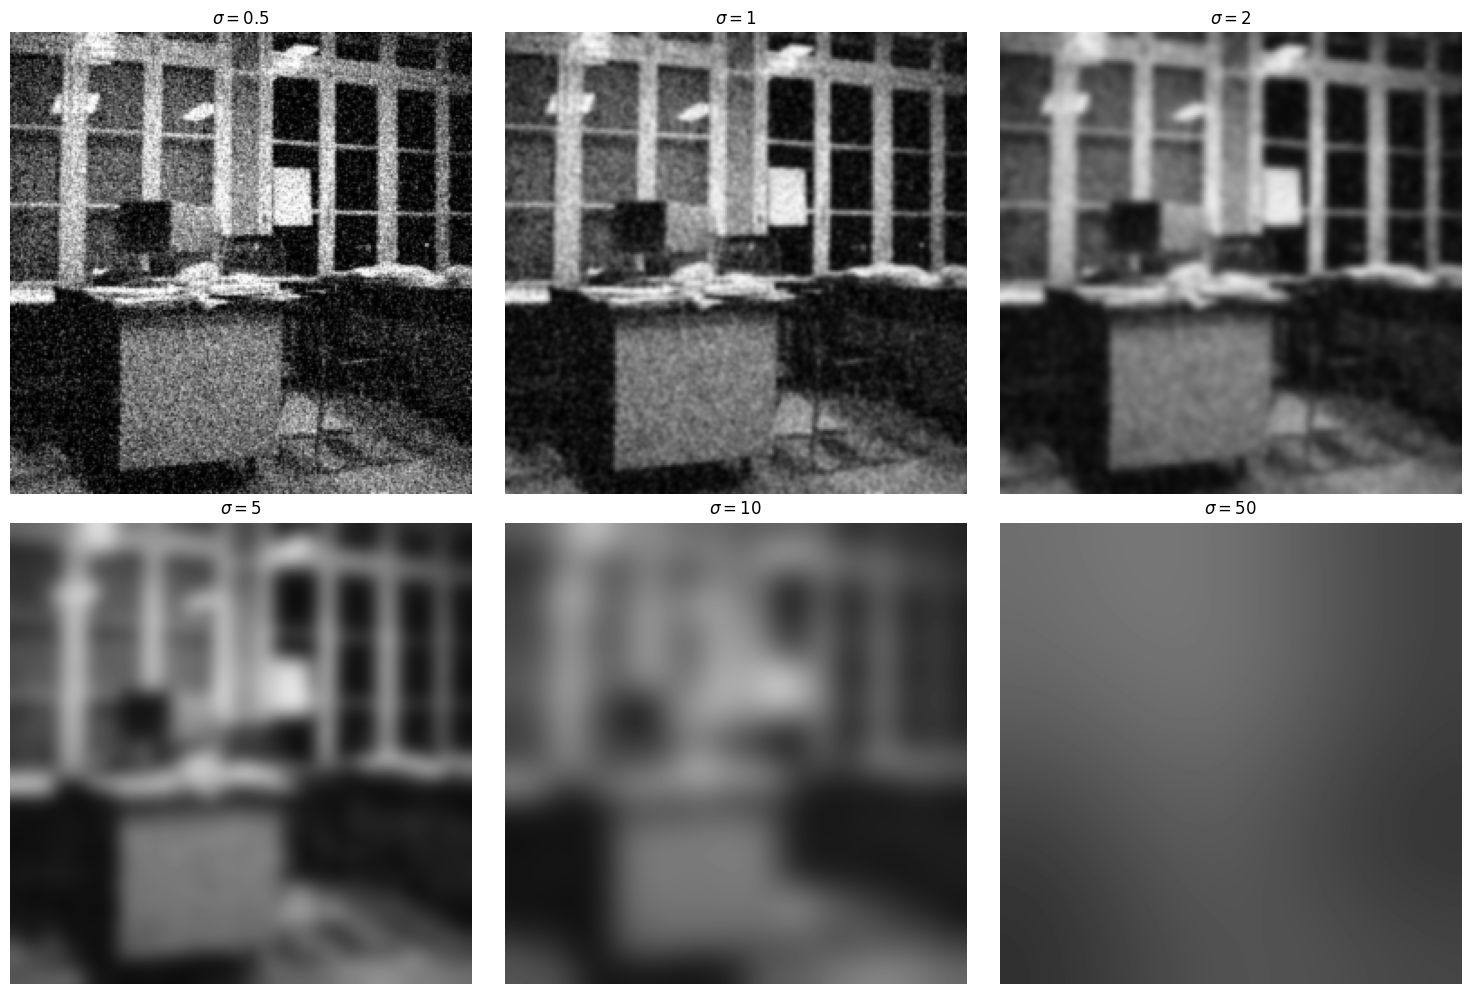

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy.ndimage import gaussian_filter

def apply_gaussian_smoothing(image, sigmas, output_path):
    num_sigmas = len(sigmas)
    num_cols = 3
    num_rows = (num_sigmas + num_cols - 1) // num_cols  # Compute the number of rows needed

    plt.figure(figsize=(num_cols * 5, num_rows * 5))  # Set figure size suitable for publication

    for i, sigma in enumerate(sigmas):
        smoothed_image = gaussian_filter(image, sigma=sigma)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(smoothed_image, cmap='gray', vmin=0, vmax=1)  # Normalize to [0, 1] for consistent display
        plt.title(f'$\sigma = {sigma}$', fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(output_path, format='png', dpi=300)  # Save with high resolution
    plt.show()  # Display the plot
    plt.close()

if __name__ == "__main__":
    noisy_image_path = 'office_noisy.png'
    sigmas = [0.5, 1, 2, 5, 10, 50]
    output_path = 'gaussian_smoothing.png'

    # Load images
    noisy_image = img_as_float(io.imread(noisy_image_path))

    # Apply Gaussian smoothing and save the plot
    apply_gaussian_smoothing(noisy_image, sigmas, output_path)


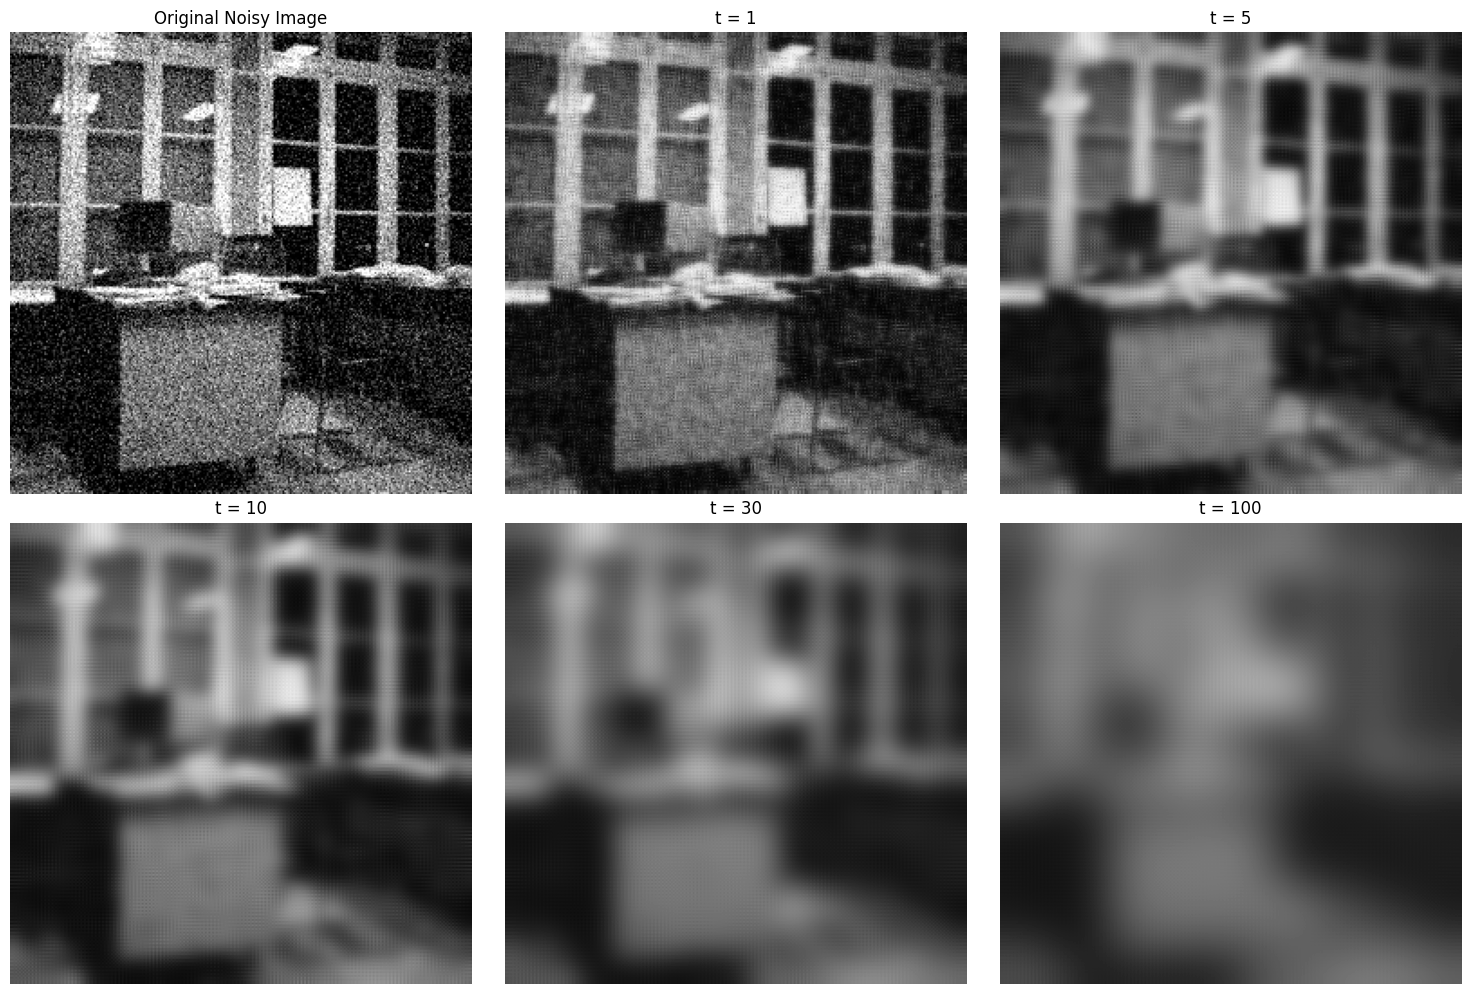

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

def linear_isotropic_diffusion(I, d, dt, num_iter):
    u = I.copy()
    for _ in range(num_iter):
        # Compute gradients
        u_x, u_y = np.gradient(u)
        u_xx, _ = np.gradient(u_x)
        _, u_yy = np.gradient(u_y)

        # Compute Laplacian
        laplacian = u_xx + u_yy

        # Update image
        u += dt * d * laplacian

        # Apply Neumann boundary conditions (zero flux)
        u[0, :] = u[1, :]      # Top boundary
        u[-1, :] = u[-2, :]    # Bottom boundary
        u[:, 0] = u[:, 1]      # Left boundary
        u[:, -1] = u[:, -2]    # Right boundary

    return u

# Load and normalize the image
noisy_image_path = 'office_noisy.png'
I = img_as_float(io.imread(noisy_image_path, as_gray=True))

# Parameters
d = 1
dt = 0.1  # Time step size
diffusion_times = [1, 5, 10, 30, 100]
num_iters = [int(t / dt) for t in diffusion_times]

# Prepare for plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot the original noisy image
axes[0, 0].imshow(I, cmap='gray', vmin=0, vmax=1)
axes[0, 0].set_title('Original Noisy Image')
axes[0, 0].axis('off')

# Perform diffusion and plot results
for ax, t, num_iter in zip(axes.flat[1:], diffusion_times, num_iters):
    u = linear_isotropic_diffusion(I, d, dt, num_iter)
    ax.imshow(u, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f't = {t}')
    ax.axis('off')

    # Save each image
    io.imsave(f'denoised_t_{t}.png', (u * 255).astype(np.uint8))

# Adjust layout and save the subplot image
plt.tight_layout()
plt.savefig('diffusion_results.png', dpi=300)  # Save with high resolution



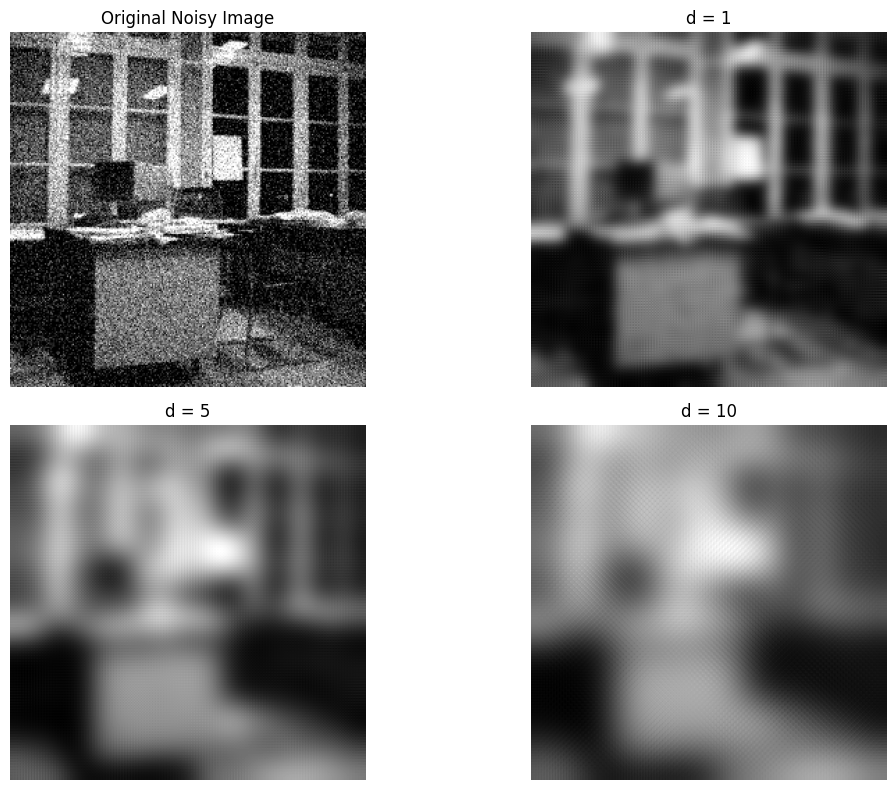

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

def linear_isotropic_diffusion(I, d, dt, num_iter):
    u = I.copy()
    for _ in range(num_iter):
        # Compute gradients
        u_x, u_y = np.gradient(u)
        u_xx, _ = np.gradient(u_x)
        _, u_yy = np.gradient(u_y)

        # Compute Laplacian
        laplacian = u_xx + u_yy

        # Update image
        u += dt * d * laplacian

        # Apply Neumann boundary conditions (zero flux)
        u[0, :] = u[1, :]      # Top boundary
        u[-1, :] = u[-2, :]    # Bottom boundary
        u[:, 0] = u[:, 1]      # Left boundary
        u[:, -1] = u[:, -2]    # Right boundary

    return u

# Load and normalize the image
noisy_image_path = 'office_noisy.png'
I = img_as_float(io.imread(noisy_image_path, as_gray=True))

# Parameters
diffusion_times = [10]
ds = [1, 5, 10]
dt = 0.1  # Time step size
num_iters = [int(t / dt) for t in diffusion_times]

# Prepare for plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot the original noisy image
axes[0, 0].imshow(I, cmap='gray')
axes[0, 0].set_title('Original Noisy Image')
axes[0, 0].axis('off')

# Perform diffusion and plot results for different d values
for i, d in enumerate(ds):
    u = linear_isotropic_diffusion(I, d, dt, num_iters[0])
    ax = axes[(i + 1) // 2, (i + 1) % 2]
    ax.imshow(u, cmap='gray')
    ax.set_title(f'd = {d}')
    ax.axis('off')

    # Save each image
    io.imsave(f'denoised_d_{d}_t_10.png', (u * 255).astype(np.uint8))

# Adjust layout and save the subplot image
plt.tight_layout()
plt.savefig('diffusion_comparison_d.png')
plt.show()


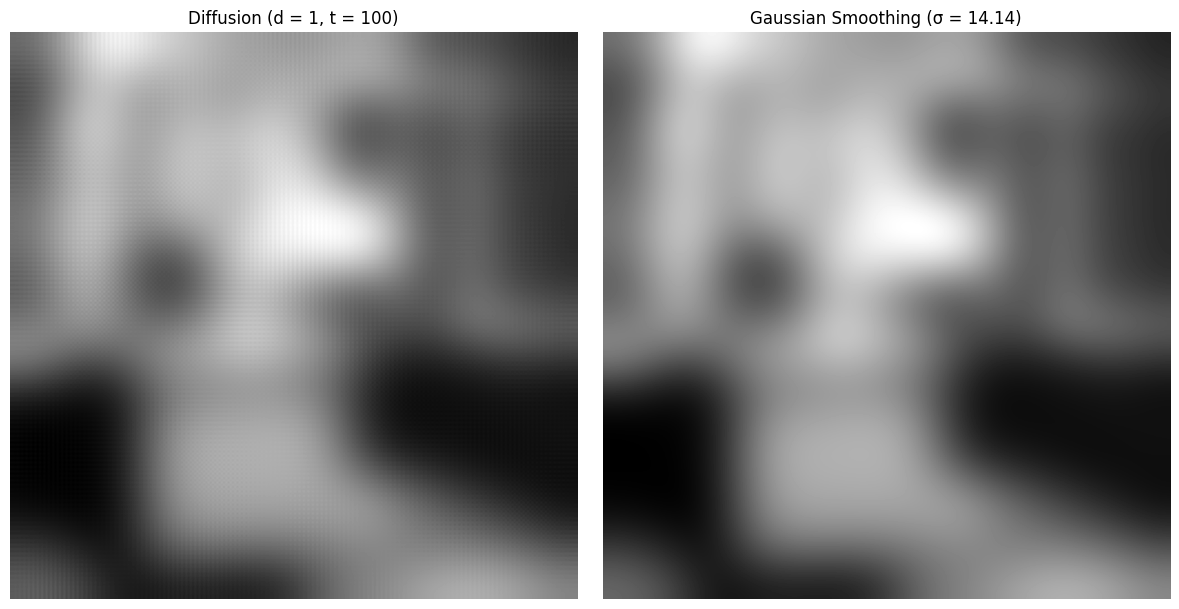

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from scipy.ndimage import gaussian_filter

def linear_isotropic_diffusion(I, d, dt, num_iter):
    u = I.copy()
    for _ in range(num_iter):
        # Compute gradients
        u_x, u_y = np.gradient(u)
        u_xx, _ = np.gradient(u_x)
        _, u_yy = np.gradient(u_y)

        # Compute Laplacian
        laplacian = u_xx + u_yy

        # Update image
        u += dt * d * laplacian

        # Apply Neumann boundary conditions (zero flux)
        u[0, :] = u[1, :]      # Top boundary
        u[-1, :] = u[-2, :]    # Bottom boundary
        u[:, 0] = u[:, 1]      # Left boundary
        u[:, -1] = u[:, -2]    # Right boundary

    return u

# Load and normalize the image
noisy_image_path = 'office_noisy.png'
I = img_as_float(io.imread(noisy_image_path, as_gray=True))

# Parameters
d = 1
dt = 0.1  # Time step size
t = 100
num_iters = int(t / dt)

# Perform isotropic linear diffusion
u_diffusion = linear_isotropic_diffusion(I, d, dt, num_iters)

# Perform Gaussian smoothing with sigma = sqrt(2 * t)
sigma = np.sqrt(2 * t)
u_gaussian = gaussian_filter(I, sigma=sigma)

# Plot and compare results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Diffused image
axes[0].imshow(u_diffusion, cmap='gray')
axes[0].set_title(f'Diffusion (d = {d}, t = {t})')
axes[0].axis('off')

# Gaussian smoothed image
axes[1].imshow(u_gaussian, cmap='gray')
axes[1].set_title(f'Gaussian Smoothing (σ = {sigma:.2f})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Save results
io.imsave('diffusion_result.png', (u_diffusion * 255).astype(np.uint8))
io.imsave('gaussian_result.png', (u_gaussian * 255).astype(np.uint8))


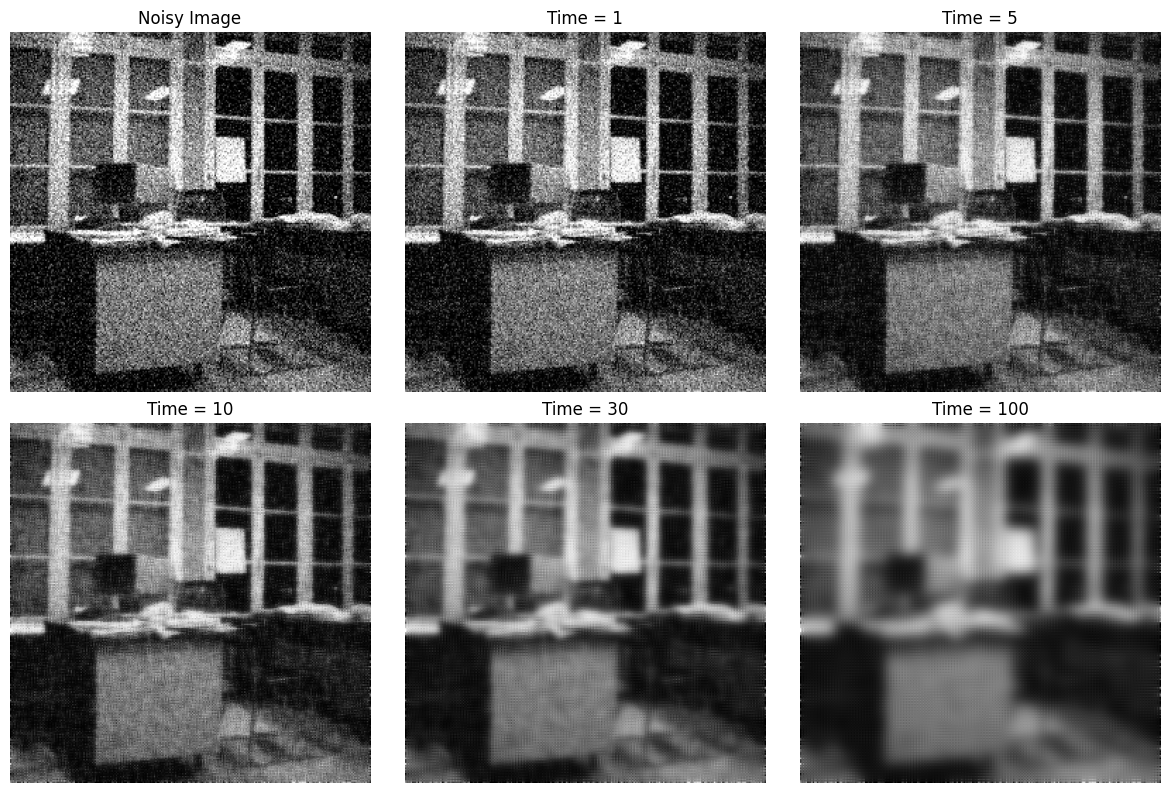

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

def perona_malik_diffusivity(grad_magnitude, lambda_value):
    return 1 / (1 + (grad_magnitude / lambda_value) ** 2)

def compute_gradient_magnitude(image):
    grad_magnitude = gaussian_gradient_magnitude(image, sigma=1)
    return grad_magnitude

def apply_neumann_boundary_conditions(gradient):
    gradient[:, 0] = 0
    gradient[:, -1] = 0
    gradient[0, :] = 0
    gradient[-1, :] = 0
    return gradient

def update_image(image, D, dt, dx):
    # Compute gradients
    grad_x = np.gradient(image, axis=1)
    grad_y = np.gradient(image, axis=0)

    # Apply Neumann boundary conditions to gradients
    grad_x = apply_neumann_boundary_conditions(grad_x)
    grad_y = apply_neumann_boundary_conditions(grad_y)

    # Compute the divergence
    div_D_grad_x = np.gradient(D * grad_x, axis=1)
    div_D_grad_y = np.gradient(D * grad_y, axis=0)

    # Apply Neumann boundary conditions to divergences
    div_D_grad_x = apply_neumann_boundary_conditions(div_D_grad_x)
    div_D_grad_y = apply_neumann_boundary_conditions(div_D_grad_y)

    # Update image
    image_new = image + dt * (div_D_grad_x + div_D_grad_y)
    return image_new

def non_linear_diffusion(image, lambda_value, time_steps, dt, dx):
    for _ in range(time_steps):
        grad_magnitude = compute_gradient_magnitude(image)
        D = perona_malik_diffusivity(grad_magnitude, lambda_value)
        image = update_image(image, D, dt, dx)
    return image

# Load the noisy "office" image (use your own method to load the image as a grayscale numpy array)
image_noisy = plt.imread('office_noisy.png').astype(np.float32)

# Set parameters
lambda_value = 0.5
dx = 1  # assuming pixel spacing is 1
dt = 0.1 # time step

# Define time points for diffusion
time_points = [1, 5, 10, 30, 100]

# Run the diffusion for different time points and store the results
results = [image_noisy]  # First element is the noisy image
for t in time_points:
    image_diffused = non_linear_diffusion(image_noisy, lambda_value, t, dt, dx)
    results.append(image_diffused)

# Plot the results and save as PNG
plt.figure(figsize=(12, 8))
# Plot noisy image first
plt.subplot(2, 3, 1)
plt.imshow(results[0], cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot images for different time points
for i, t in enumerate(time_points):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i + 1], cmap='gray')
    plt.title(f'Time = {t}')
    plt.axis('off')

plt.tight_layout()

# Save the figure
plt.savefig('non_linear_diffusion_results.png', dpi=300)
plt.show()


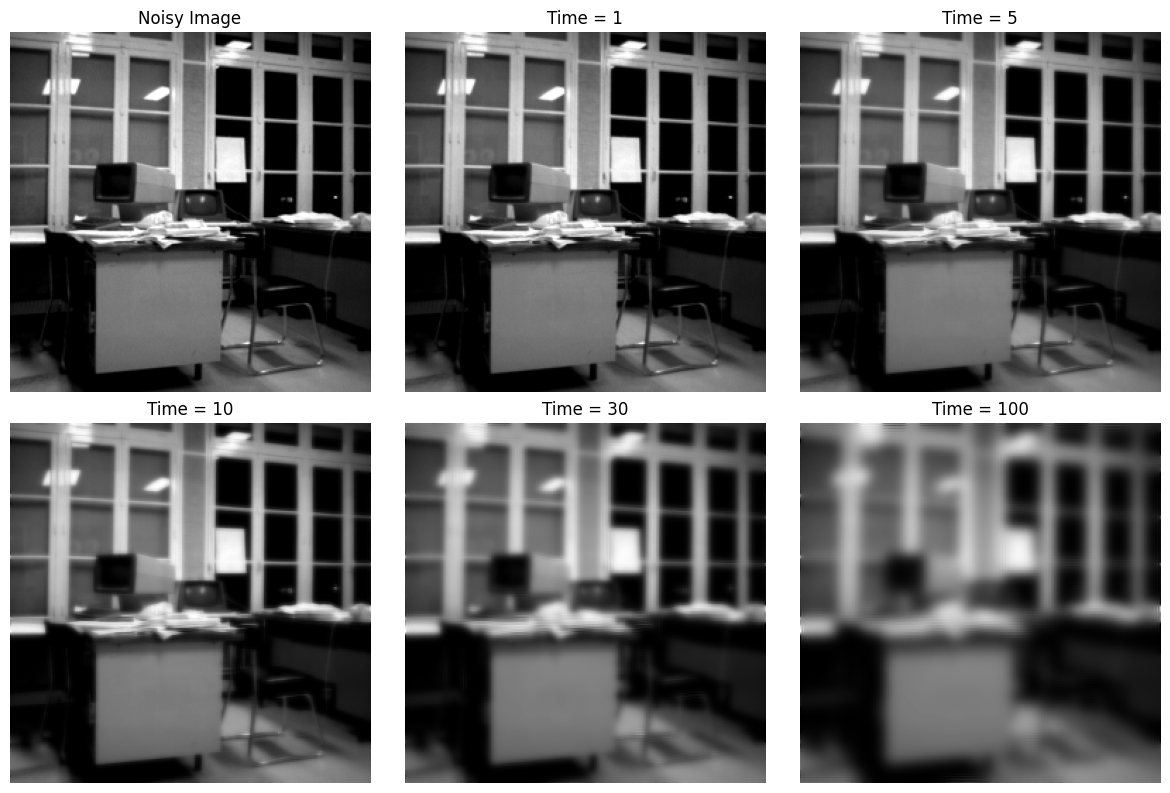

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

def perona_malik_diffusivity(grad_magnitude, lambda_value):
    return 1 / (1 + (grad_magnitude / lambda_value) ** 2)

def compute_gradient_magnitude(image):
    grad_magnitude = gaussian_gradient_magnitude(image, sigma=1)
    return grad_magnitude

def apply_neumann_boundary_conditions(gradient):
    gradient[:, 0] = 0
    gradient[:, -1] = 0
    gradient[0, :] = 0
    gradient[-1, :] = 0
    return gradient

def update_image(image, D, dt, dx):
    # Compute gradients
    grad_x = np.gradient(image, axis=1)
    grad_y = np.gradient(image, axis=0)

    # Apply Neumann boundary conditions to gradients
    grad_x = apply_neumann_boundary_conditions(grad_x)
    grad_y = apply_neumann_boundary_conditions(grad_y)

    # Compute the divergence
    div_D_grad_x = np.gradient(D * grad_x, axis=1)
    div_D_grad_y = np.gradient(D * grad_y, axis=0)

    # Apply Neumann boundary conditions to divergences
    div_D_grad_x = apply_neumann_boundary_conditions(div_D_grad_x)
    div_D_grad_y = apply_neumann_boundary_conditions(div_D_grad_y)

    # Update image
    image_new = image + dt * (div_D_grad_x + div_D_grad_y)
    return image_new

def non_linear_diffusion(image, lambda_value, time_steps, dt, dx):
    for _ in range(time_steps):
        grad_magnitude = compute_gradient_magnitude(image)
        D = perona_malik_diffusivity(grad_magnitude, lambda_value)
        image = update_image(image, D, dt, dx)
    return image

# Load the noisy "office" image (use your own method to load the image as a grayscale numpy array)
image_noisy = plt.imread('office.png').astype(np.float32)

# Set parameters
lambda_value = 0.5
dx = 1  # assuming pixel spacing is 1
dt = 0.1 # time step

# Define time points for diffusion
time_points = [1, 5, 10, 30, 100]

# Run the diffusion for different time points and store the results
results = [image_noisy]  # First element is the noisy image
for t in time_points:
    image_diffused = non_linear_diffusion(image_noisy, lambda_value, t, dt, dx)
    results.append(image_diffused)

# Plot the results and save as PNG
plt.figure(figsize=(12, 8))
# Plot noisy image first
plt.subplot(2, 3, 1)
plt.imshow(results[0], cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot images for different time points
for i, t in enumerate(time_points):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i + 1], cmap='gray')
    plt.title(f'Time = {t}')
    plt.axis('off')

plt.tight_layout()

# Save the figure
plt.savefig('Cnon_linear_diffusion_results.png', dpi=300)
plt.show()


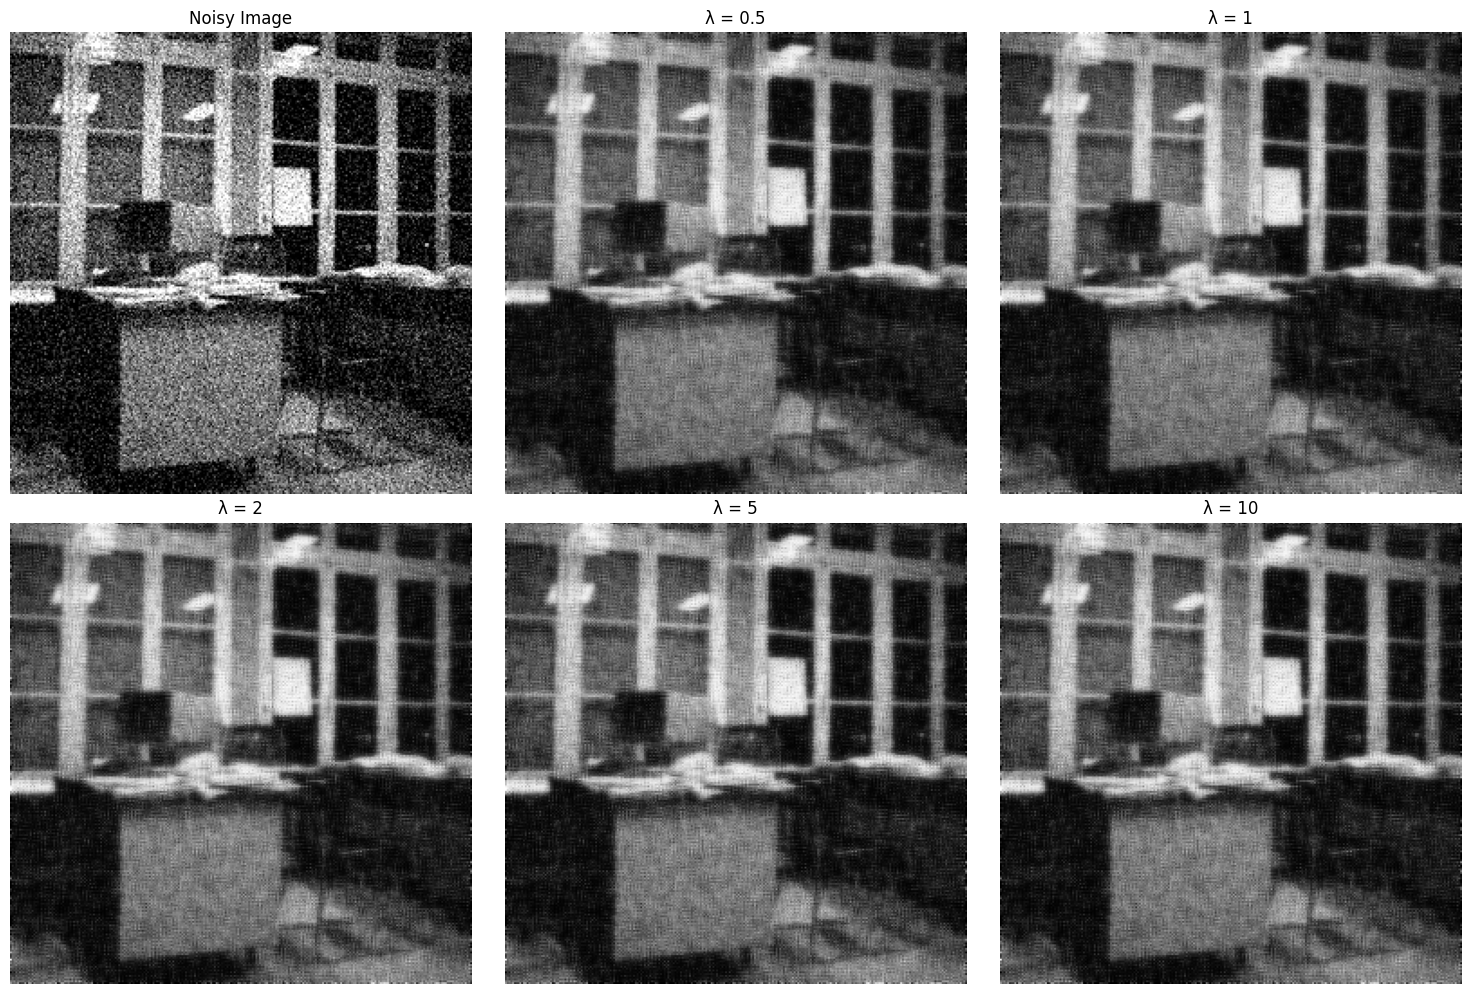

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

def perona_malik_diffusivity(grad_magnitude, lambda_value):
    return 1 / (1 + (grad_magnitude / lambda_value) ** 2)

def compute_gradient_magnitude(image):
    grad_magnitude = gaussian_gradient_magnitude(image, sigma=1)
    return grad_magnitude

def apply_neumann_boundary_conditions(gradient):
    gradient[:, 0] = 0
    gradient[:, -1] = 0
    gradient[0, :] = 0
    gradient[-1, :] = 0
    return gradient

def update_image(image, D, dt, dx):
    # Compute gradients
    grad_x = np.gradient(image, axis=1)
    grad_y = np.gradient(image, axis=0)

    # Apply Neumann boundary conditions to gradients
    grad_x = apply_neumann_boundary_conditions(grad_x)
    grad_y = apply_neumann_boundary_conditions(grad_y)

    # Compute the divergence
    div_D_grad_x = np.gradient(D * grad_x, axis=1)
    div_D_grad_y = np.gradient(D * grad_y, axis=0)

    # Apply Neumann boundary conditions to divergences
    div_D_grad_x = apply_neumann_boundary_conditions(div_D_grad_x)
    div_D_grad_y = apply_neumann_boundary_conditions(div_D_grad_y)

    # Update image
    image_new = image + dt * (div_D_grad_x + div_D_grad_y)
    return image_new

def non_linear_diffusion(image, lambda_value, time_steps, dt, dx):
    for _ in range(time_steps):
        grad_magnitude = compute_gradient_magnitude(image)
        D = perona_malik_diffusivity(grad_magnitude, lambda_value)
        image = update_image(image, D, dt, dx)
    return image

# Load the noisy "office" image (use your own method to load the image as a grayscale numpy array)
image_noisy = plt.imread('office_noisy.png').astype(np.float32)

# Set parameters
dx = 1  # assuming pixel spacing is 1
dt = 0.1 # time step

# Define lambda values and time point
lambda_values = [0.5, 1, 2, 5, 10]
time_point = 10

# Run the diffusion for each lambda and store the results
results = [image_noisy]  # Include noisy image as the first element
for lambda_value in lambda_values:
    image_diffused = non_linear_diffusion(image_noisy, lambda_value, time_point, dt, dx)
    results.append(image_diffused)

# Plot the results and save as PNG
plt.figure(figsize=(15, 10))
# Plot noisy image first
plt.subplot(2, 3, 1)
plt.imshow(results[0], cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

# Plot images for different lambda values
for i, lambda_value in enumerate(lambda_values):
    plt.subplot(2, 3, i + 2)
    plt.imshow(results[i + 1], cmap='gray')
    plt.title(f'λ = {lambda_value}')
    plt.axis('off')

plt.tight_layout()

# Save the figure
plt.savefig('diffusion_lambda_results.png', dpi=300)
plt.show()
